# K-Means Cluster

Another option to clustering is k-means. The problem with hierarchical clustering is the runtime. K means runs significantly faster on large datasets

Limitation of K-Means:

* Bias towards equal sized cluster 

* Impact of randomization (seed)

## Step 1: Generate Cluster Centers

kmeans(obs, k_or_guess, iter, thresh, check_finite)

obs: standardized observation

k_or_guess: number of clusters

iter: number of iterations(default:20)

thresh: threshold(default:1e-05) - algorithm is terminated if the change in distortion since the lask k-mean iteration is less than or equal to thresh
    
    * Distortion sum of squares of distances of points from cluster centers 

check_finite: whether to check if observations contain only finite numbers (default: True)-ensure the data point with NaN or infinite value are not considered for classification 

## Step 2: Generate cluster labels

vq(obs, code_book, check_finite = True)

obs: standardized observations

code_book: cluster centers

check_finite: whether to check if observations contain only finite numbers (default: True)

## Find the Right Number for K using Elbow Method

Finding the right number of cluster using a plot and find an elbow (sharp turn from rapid decrease to a gradual decrease)

Elbow method only gives an ideal number of clusters.

Elbow method fails when data is evenly distributed

# Import Packages

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Import the whiten function
from scipy.cluster.vq import whiten

# Import Dataset

## Fifa

In [2]:
fifa_import_path = 'dataset/input/original/fifa_full.csv'
fifa = pd.read_csv(fifa_import_path, nrows= 5000)
fifa.head()

,sliding_tackle,aggression
0,23,63
1,26,48
2,33,56
3,38,78
4,11,29


## Movies

In [58]:
plots = pd.read_csv("dataset/input/original/movies_plot.csv")
plots = list(plots['Plot'])[:250]
len(plots)

250

# Scale

In [3]:
fifa['scaled_sliding_tackle'] = whiten(fifa['sliding_tackle'])
fifa['scaled_aggression'] = whiten(fifa['aggression'])
fifa.head()

,sliding_tackle,aggression,scaled_sliding_tackle,scaled_aggression
0,23,63,0.967671,3.723843
1,26,48,1.093889,2.837214
2,33,56,1.388398,3.310083
3,38,78,1.598762,4.610472
4,11,29,0.462799,1.714150


# Generate Cluster Centers

In [4]:
cluster_centers, distortion = kmeans(fifa[['scaled_sliding_tackle', 'scaled_aggression']],3)

In [5]:
cluster_centers

array([[2.98628293, 4.37598299],
       [0.86226882, 2.08469647],
       [1.35228556, 3.73271164]])

In [6]:
distortion

0.5462110224347649

# Assign Cluster Labels

In [7]:
fifa['cluster_labels'], distortion_list = vq(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 
                                             cluster_centers)
fifa.head()

,sliding_tackle,aggression,scaled_sliding_tackle,scaled_aggression,cluster_labels
0,23,63,0.967671,3.723843,2
1,26,48,1.093889,2.837214,1
2,33,56,1.388398,3.310083,2
3,38,78,1.598762,4.610472,2
4,11,29,0.462799,1.714150,1


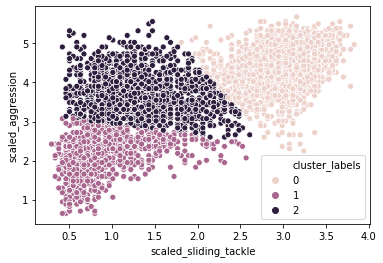

In [8]:
sns.scatterplot(x = 'scaled_sliding_tackle', y = 'scaled_aggression', hue = 'cluster_labels', data=fifa)
plt.show()

# Elbow Method

## Distinct Cluster

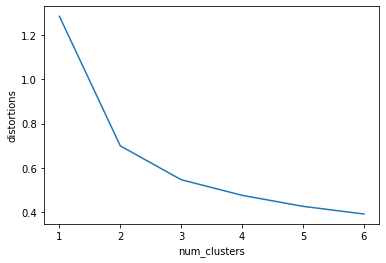

In [9]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(fifa[['scaled_sliding_tackle', 'scaled_aggression']], i)
    distortions.append(distortion)

# Create a data frame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

# Clustering Img

In [10]:
import matplotlib.image as img
from IPython.display import Image

In [11]:
# Read batman image and print dimensions
batman_image = img.imread('fig/batman.jpg')
print(batman_image.shape)

(169, 269, 3)


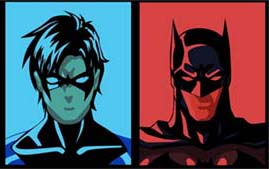

In [12]:
Image('fig/batman.jpg')

## Standardized Img

In [13]:
r = []
g = []
b = []

# Store RGB values of all pixels in lists r, g and b
for i in batman_image:
    for temp_r, temp_g, temp_b in i:
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)
        
batman_df = pd.DataFrame({'red': r, 
                          'blue': b, 
                          'green': g, 
                          'scaled_red': whiten(r), 
                          'scaled_blue': whiten(b), 
                          'scaled_green': whiten(g)})
batman_df.head()

,red,blue,green,scaled_red,scaled_blue,scaled_green
0,36,25,28,0.450157,0.279912,0.370103
1,39,19,21,0.487671,0.212733,0.277577
2,52,21,20,0.650227,0.235126,0.264359
3,61,28,27,0.762767,0.313502,0.356885
4,37,18,15,0.462662,0.201537,0.198269


## Elbow Plot

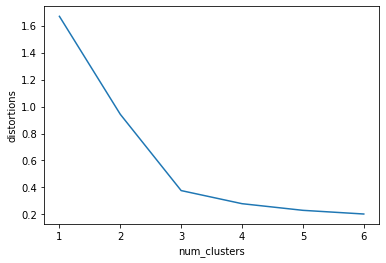

In [14]:
distortions = []
num_clusters = range(1,7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(batman_df[['scaled_red', 'scaled_blue', 'scaled_green']], i)
    distortions.append(distortion)

# Create a data frame with two lists, num_clusters and distortions
elbow_plot = pd.DataFrame({
    'num_clusters': num_clusters,
    'distortions': distortions
})

# Create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

Notice that there are 3 distinct colors in the image. This is supported by the elbow plot

## Dominant Color

Cluster centers obtained are standardized RGB values. 

Standardized Value = Actual Value/stdev

Actual Value = standardized value * stdev

To scale the actual value into 0-1 value (rgb has a max range of 255):

value_0_to_1 = actual value / 255 = standardized value * stdev / 255

In [15]:
cluster_centers

array([[1.0629001 , 2.65651035, 2.62337264],
       [1.57291045, 0.45671338, 0.503682  ],
       [0.38144665, 0.40993163, 0.35715962],
       [0.79975875, 1.56140311, 1.66452687],
       [0.07648833, 0.06734535, 0.04403327],
       [2.66378072, 0.78301218, 0.90521967]])

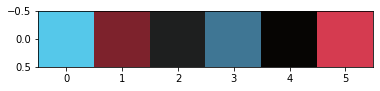

In [16]:
# Get standard deviations of each color
r_std, g_std, b_std = batman_df[['red', 'green', 'blue']].std()

colors = []

for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    # Convert each standardized value to scaled value
    colors.append(( 
        scaled_r * r_std / 255, 
        scaled_g * g_std / 255, 
        scaled_b * b_std / 255
    ))

plt.imshow([colors])
plt.show()

# Document Clustering

Steps: 

1) clean data before processing

2) Determine the importance of the terms in a document (in TF-IDF matrix)

TF-IDF = Term Frequency - Inverse Document Frequency.

A weighted measure: evaluate how important a word is to a document in a collection

3) Cluster the TF-IDF matrix

4) Find top terms, documents in each cluster

## Clean and tokenized data

Convert text into smaller parts called tokens

In [54]:
from nltk.tokenize import word_tokenize
import re


stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'youre', 
              'youve', 'youll', 'youd', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 
              'his', 'himself', 'she', 'shes', 'her', 'hers', 'herself', 'it', 'its', 'its', 'itself', 
              'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 
              'that', 'thatll', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 
              'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 
              'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 
              'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 
              'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 
              'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 
              'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 
              'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'dont', 'should', 'shouldve', 
              'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', 'arent', 'couldn', 'couldnt', 'didn', 
              'didnt', 'doesn', 'doesnt', 'hadn', 'hadnt', 'hasn', 'hasnt', 'haven', 'havent', 'isn', 'isnt', 
              'ma', 'mightn', 'mightnt', 'mustn', 'mustnt', 'needn', 'neednt', 'shan', 'shant', 'shouldn', 
              'shouldnt', 'wasn', 'wasnt', 'weren', 'werent', 'won', 'wont', 'wouldn', 'wouldnt']

def remove_noise(text, stop_words = stop_words):
    tokens = word_tokenize(text)
    cleaned_tokens = []
    for token in tokens:
        # Remove special characters
        token = re.sub('[^A-Za-z0-9]+', '', token)
        # Check if it contains any stopwords
        if len(token) > 1 and token.lower() not in stop_words:
            # Get Lowercase
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

In [39]:
remove_noise("It is lovely weather we are having. I hope the weather continues")

['lovely', 'weather', 'hope', 'weather', 'continues']

## TF-IDF

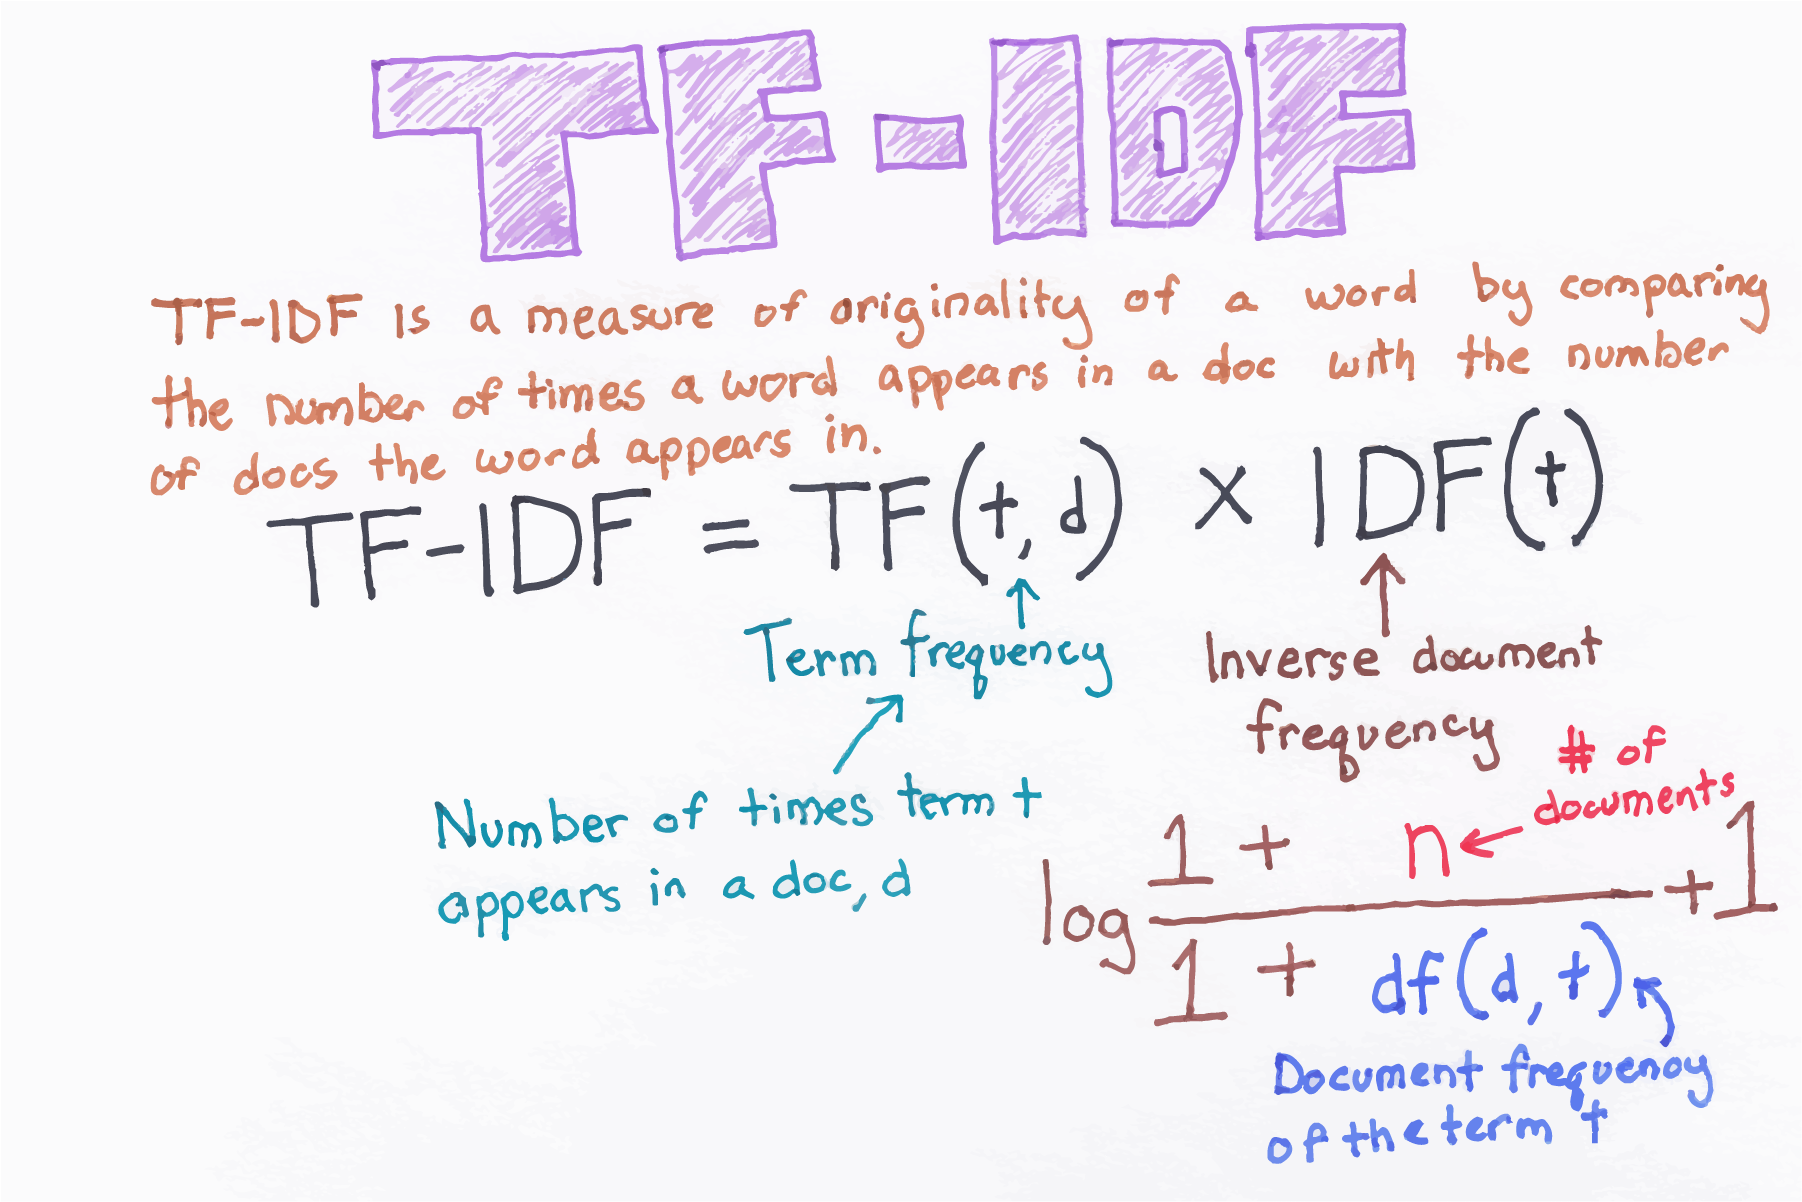

In [26]:
Image("fig/illustration/tfidf.png")

In [59]:
# Import TfidfVectorizer class from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df = 0.75, min_df = 0.1, max_features = 50, tokenizer = remove_noise)

# Max DF and Min DF = max and min fraction of document a word should occur in.
# terms that appear more than 20% but less than 80% documents
# Max Feature = top 50 terms
# Use custom function as a tokenizer

# Use the .fit_transform() method on the list plots
tfidf_matrix = tfidf_vectorizer.fit_transform(plots)
# Create a tfidf matrix of the data
tfidf_matrix

<250x50 sparse matrix of type '<class 'numpy.float64'>'
	with 3406 stored elements in Compressed Sparse Row format>

## Cluster TF-IDF Matrix

In [63]:
num_clusters = 2

# Generate cluster centers through the kmeans function
# Use the .todense() method to convert the sparse matrix, 
# tfidf_matrix to a normal matrix for the kmeans() function to process. 
cluster_centers, distortion = kmeans(tfidf_matrix.todense(),num_clusters)

# Generate terms from the tfidf_vectorizer object
terms = tfidf_vectorizer.get_feature_names()

## Top Terms

In [65]:
for i in range(num_clusters):
    # Term as key, and TF-IDF as values
    center_terms = dict(zip(terms, list(cluster_centers[i])))
    # Sort the terms and print top 3 terms
    sorted_terms = sorted(center_terms, key=center_terms.get, reverse=True)
    print(sorted_terms[:3])

['police', 'man', 'wife']
['back', 'father', 'one']
